# Analysis of Sales Data

In [2]:
import pandas
import numpy as N
import tqdm
import matplotlib.pyplot as pyplot
import seaborn
from pathlib import Path

seaborn.set_style('whitegrid')

## Load Zipcode/CPI data

In [20]:
dfZip = pandas.read_csv('data/nyc_zipcodes.csv')
dfCPI = pandas.read_csv('data/cpi.csv')
mapCPI = {year:cpi for year,cpi in zip(dfCPI['year'], dfCPI['cpi'])}
dfFilterCategory = pandas.read_csv('data/filter_building_class_category.csv')
setCategories = set(dfFilterCategory['category'])

## Load Sales Data

In [3]:
dfSales = pandas.read_csv('processed/sales.csv')
dfSales['SALE DATE'] = pandas.to_datetime(dfSales['SALE DATE'])
dfSales

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,402,42,,S1,96 AVENUE B,,...,1,1,2,1400,1839,1901,1,S1,0,2014-12-05
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,372,37,,S2,17 AVENUE D,,...,2,1,3,826,2075,1910,1,S2,0,2014-01-31
2,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377,66,,C0,243 EAST 7TH STREET,,...,3,0,3,2381,3084,1899,1,C0,2900000,2014-11-26
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372,51,,C7,300 EAST 2ND STREET,,...,8,2,10,2650,7620,1920,2,C7,0,2014-07-18
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,373,15,,D1,324 EAST 4TH STREET,,...,11,0,11,2212,8294,1920,2,C3,0,2014-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571739,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1323,,R4,210 BENNETT AVENUE,5C,...,1,0,1,0,0,2008,2,R4,319410,2011-08-04
571740,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1325,,R4,210 BENNETT AVENUE,5E,...,1,0,1,0,0,2008,2,R4,385067,2011-06-10
571741,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1327,,R4,210 BENNETT AVENUE,6B,...,1,0,1,0,0,2008,2,R4,505000,2011-06-07
571742,1,WASHINGTON HEIGHTS UPPER,28 COMMERCIAL CONDOS,4,2180,1230,,R5,736 WEST 187 STREET,PRK30,...,0,1,1,0,0,2003,4,R5,0,2011-04-22


### Examine the distribution of data

In [4]:
dfSales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [18]:
dfSales['BUILDING CLASS CATEGORY'].value_counts()

13  CONDOS - ELEVATOR APARTMENTS                87136
10  COOPS - ELEVATOR APARTMENTS                 80755
01  ONE FAMILY HOMES                            57465
02  TWO FAMILY HOMES                            53141
01  ONE FAMILY DWELLINGS                        49831
02  TWO FAMILY DWELLINGS                        45923
07  RENTALS - WALKUP APARTMENTS                 25638
28  COMMERCIAL CONDOS                           18005
09  COOPS - WALKUP APARTMENTS                   15744
03  THREE FAMILY HOMES                          15217
03  THREE FAMILY DWELLINGS                      13532
25  LUXURY HOTELS                               10718
04  TAX CLASS 1 CONDOS                           9821
45  CONDO HOTELS                                 9192
05  TAX CLASS 1 VACANT LAND                      8042
15  CONDOS - 2-10 UNIT RESIDENTIAL               7631
22  STORE BUILDINGS                              7502
12  CONDOS - WALKUP APARTMENTS                   5788
29  COMMERCIAL GARAGES      

In [5]:
dfSales['ZIP CODE'].value_counts()

10019    37317
10023     9299
11211     8351
10314     8254
11201     7809
         ...  
10803       16
11227        4
11430        1
11241        1
11697        1
Name: ZIP CODE, Length: 189, dtype: int64

In [28]:
### Add year and adjusted price columns
dfSales['year'] = dfSales['SALE DATE'].map(lambda x:x.year)
dfSales['real price'] = [price / mapCPI[year] * 100 for price,year in zip(dfSales['SALE PRICE'], dfSales['year'])]

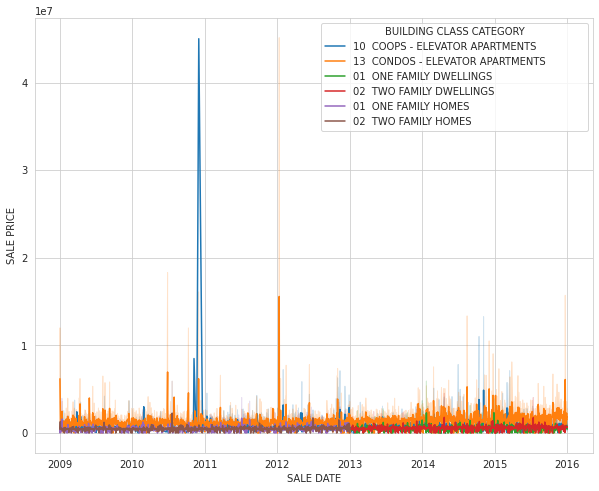

In [25]:
maskCategory = dfSales['BUILDING CLASS CATEGORY'].map(lambda x: x in setCategories)
maskPositivePrice = dfSales['real price'] > 0

fig, ax = pyplot.subplots(figsize=(10,8))
seaborn.lineplot(data=dfSales[maskCategory & maskPositivePrice], x='SALE DATE', y='SALE PRICE', hue='BUILDING CLASS CATEGORY', ax=ax)
fig.savefig('figures/real_price_wrt_date.png', dpi=300)

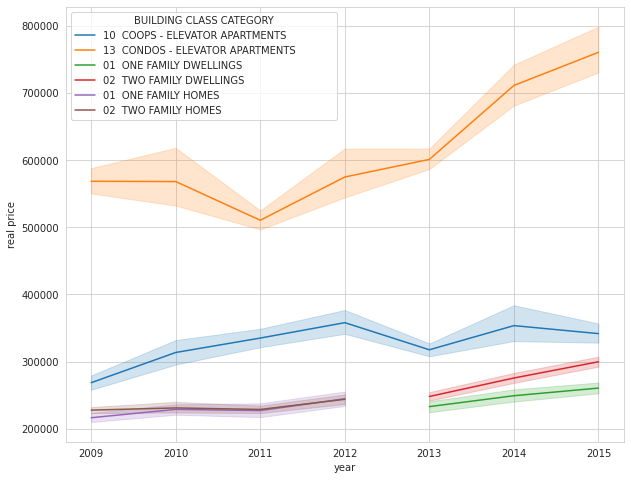

In [29]:
fig, ax = pyplot.subplots(figsize=(10,8))
seaborn.lineplot(data=dfSales[maskCategory & maskPositivePrice], x='year', y='real price', hue='BUILDING CLASS CATEGORY', ax=ax)
fig.savefig('figures/real_price_wrt_year.png', dpi=300)

In [30]:
dfSales['BOROUGH'].value_counts()

4    166713
1    160448
3    159427
5     46168
2     38988
Name: BOROUGH, dtype: int64

In [37]:
dfSales.drop_duplicates(subset=['NEIGHBORHOOD'])[40:-40]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,year,real price
24524,5,ANNADALE,01 ONE FAMILY HOMES,1,5395,32,,A1,541 SYCAMORE STREET,,...,1,13320,4696,1985,1,A1,1200000,2012-08-15,2012,522648.083624
24706,5,ARDEN HEIGHTS,01 ONE FAMILY HOMES,1,5724,60,,A5,101 GARY STREET,,...,1,2600,2304,2002,1,A5,460000,2012-05-17,2012,200348.432056
24899,5,ARROCHAR,01 ONE FAMILY HOMES,1,3074,17,,A2,118 WADSWORTH AVENUE,,...,1,4300,888,1950,1,A2,0,2012-09-20,2012,0.000000
24927,5,ARROCHAR-SHORE ACRES,01 ONE FAMILY HOMES,1,2832,96,,A1,9 NEW LANE,,...,1,3050,1152,1910,1,A1,0,2012-03-13,2012,0.000000
24947,5,BLOOMFIELD,25 LUXURY HOTELS,4,1725,570,,H2,1100 SOUTH AVENUE,,...,1,243294,125450,2001,4,H2,415000,2012-12-31,2012,180749.128920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127268,3,WILLIAMSBURG-NORTH,01 ONE FAMILY DWELLINGS,1,2310,12,,A5,98 NORTH 9TH STREET,,...,1,1667,1466,1910,1,A5,0,2015-01-28,2015,0.000000
127832,3,WILLIAMSBURG-SOUTH,02 TWO FAMILY DWELLINGS,1,2160,9,,B9,59 DIVISION AVE,,...,2,1110,2320,1899,1,B9,825000,2015-02-05,2015,348101.265823
128186,3,WINDSOR TERRACE,01 ONE FAMILY DWELLINGS,1,877,41,,A5,564 17TH STREET,,...,1,1003,1048,1910,1,A5,1100000,2015-02-11,2015,464135.021097
128364,3,WYCKOFF HEIGHTS,01 ONE FAMILY DWELLINGS,1,3212,16,,A9,1392 WILLOUGHBY AVENUE,,...,1,2250,1210,1940,1,A9,0,2015-10-23,2015,0.000000
